# Statistic Analysis NYC Property Sales
---

## Project Overview
In this case, we will perform statistic analysis using `NYC Property Sales` dataset. This dataset contains every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period. The completion dataset can be accesed [here](https://www.kaggle.com/datasets/new-york-city/nyc-property-sales)


## Understanding Dataset
The dataset used in this project is NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

- Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

## Used Library

In [1]:
%matplotlib inline
import math
import statistics
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Math, Latex
from IPython.core.display import Image
import numpy as np
import pandas as pd

## Data Loading

**Load Dataset**

In [2]:
url = "../dataset/nyc-rolling-sales.csv"
df_nyc = pd.read_csv(url)

**Row and Column of Dataset**

In [3]:
df_nyc.shape

(84548, 22)

**Data**

In [4]:
df_nyc

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


**Detail Information**

In [5]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Based on detailed information, the entire dataframe has been filled and there is no duplication of data. However, It doesn't mean the data is clean, we will do further checks later.

Now, we replace Borough with its name based on dataset description.

In [6]:
df_nyc['BOROUGH'] = df_nyc.BOROUGH.replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Islands"})
df_nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


## Data Cleaning
___

First we change several data type  in order to be processed numerically 

In [7]:
df_nyc['SALE DATE'] = pd.to_datetime(df_nyc['SALE DATE'], errors='coerce')
df_nyc['SALE PRICE'] = pd.to_numeric(df_nyc['SALE PRICE'], errors='coerce')
df_nyc['LAND SQUARE FEET'] = pd.to_numeric(df_nyc['LAND SQUARE FEET'], errors='coerce')
df_nyc['GROSS SQUARE FEET']= pd.to_numeric(df_nyc['GROSS SQUARE FEET'], errors='coerce')
df_nyc['TAX CLASS AT TIME OF SALE'] = df_nyc['TAX CLASS AT TIME OF SALE'].astype('category')
df_nyc['TAX CLASS AT PRESENT'] = df_nyc['TAX CLASS AT PRESENT'].astype('category')

Lets see the columns with `Numerical` data type

In [8]:
numerical = [var for var in df_nyc.columns if df_nyc[var].dtype!='O']
numerical

['Unnamed: 0',
 'TAX CLASS AT PRESENT',
 'BLOCK',
 'LOT',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'TAX CLASS AT TIME OF SALE',
 'SALE PRICE',
 'SALE DATE']

And now we look into columns with `Categorical` data type

In [9]:
# Mencari kolom yang bertipe data object
categorical = [var for var in df_nyc.columns if df_nyc[var].dtype=='O']
categorical

['BOROUGH',
 'NEIGHBORHOOD',
 'BUILDING CLASS CATEGORY',
 'EASE-MENT',
 'BUILDING CLASS AT PRESENT',
 'ADDRESS',
 'APARTMENT NUMBER',
 'BUILDING CLASS AT TIME OF SALE']

**Drop Unused Column**

We remove unnecessary columns

In [10]:
df_nyc.drop(['Unnamed: 0','EASE-MENT', 'APARTMENT NUMBER'], axis=1, inplace=True)

**Drop Duplicated Data**

First, we examine duplicated data

In [11]:
df_nyc.duplicated().sum()

765

From the output, there are `765` duplicated data. Lets drop it.

In [12]:
df_nyc.drop_duplicates(inplace=True)

In [13]:
df_nyc.duplicated().sum()

0

The output indicates the duplicated data has been removed

**Replacing Null Data**

We replace null data with NaN, so that it can be easily detected

In [14]:
df_nyc.replace('0', np.nan, inplace=True)
df_nyc.replace(' ', np.nan, inplace=True)
df_nyc.replace(' -  ', np.nan, inplace=True)
df_nyc['YEAR BUILT'].replace(0, np.nan, inplace=True)

In [15]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83783 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         83783 non-null  object        
 1   NEIGHBORHOOD                    83783 non-null  object        
 2   BUILDING CLASS CATEGORY         83783 non-null  object        
 3   TAX CLASS AT PRESENT            83045 non-null  category      
 4   BLOCK                           83783 non-null  int64         
 5   LOT                             83783 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83045 non-null  object        
 7   ADDRESS                         83783 non-null  object        
 8   ZIP CODE                        83783 non-null  int64         
 9   RESIDENTIAL UNITS               83783 non-null  int64         
 10  COMMERCIAL UNITS                83783 non-null  int64         
 11  TOTAL U

From detail information, the NaN/Null Data is already detected. It indicated with several columns are not as much as index of the entries. 

In [16]:
df_nyc.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                         6885
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

**Fill Numerical Columns with its mean**

In [17]:
df_nyc['LAND SQUARE FEET'].fillna(df_nyc['LAND SQUARE FEET'].mean(), inplace=True)
df_nyc['GROSS SQUARE FEET'].fillna(df_nyc['GROSS SQUARE FEET'].mean(), inplace=True)

Missing value is read in 3 columns, but we only fill in the 2 columns above, because the column `SALE PRICE` is the target of data.

In [18]:
df_nyc.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                      0
GROSS SQUARE FEET                     0
YEAR BUILT                         6885
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

Now only categorical columns and target data are left that have missing values. Now, We can drop it entirely.

In [19]:
df_nyc = df_nyc.dropna()
df_nyc.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

**Checking Outlier**

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


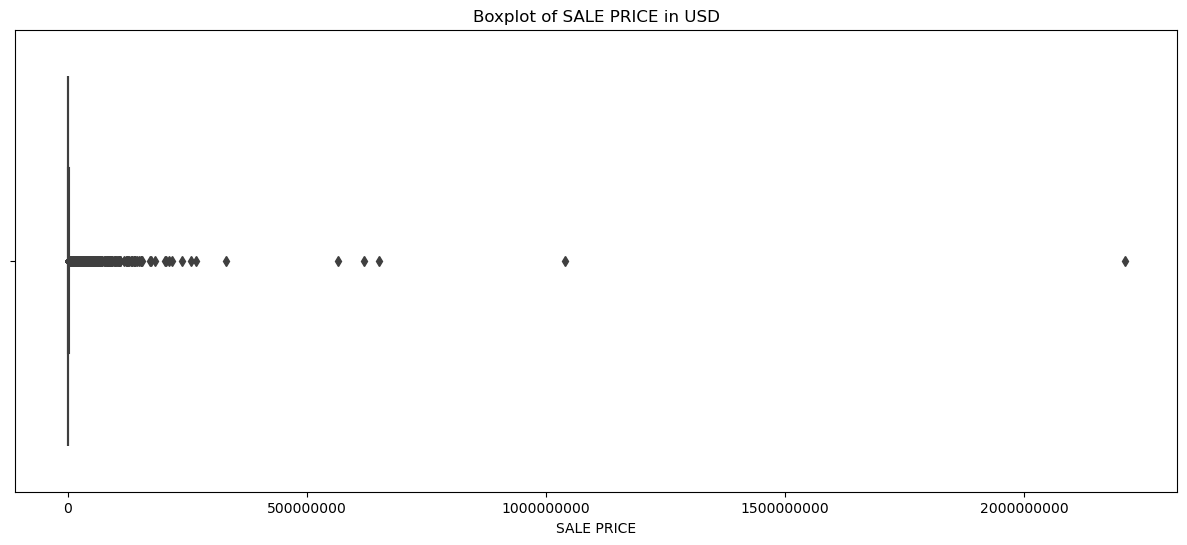

In [20]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=df_nyc)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

Based on the output, there are still outliers in the target column. We will limit the use of the column to ensure the distribution of the data we process is good. We will use data with sale prices value in range 100.000 - 500.000 USD 

In [21]:
df_nyc = df_nyc[(df_nyc['SALE PRICE'] > 100000) & (df_nyc['SALE PRICE'] < 5000000)]

We will also use data with total units value in range `0-50`

In [22]:
df_nyc = df_nyc[(df_nyc['TOTAL UNITS'] > 0) & (df_nyc['TOTAL UNITS'] < 50)]

Ensure there are no data entry errors in the column

In [23]:
# Menghapus data yang jika Commercial Units dan Residential Units dijumlahkan tidak sama dengan Total Units
df_nyc = df_nyc[df_nyc['TOTAL UNITS'] == df_nyc['COMMERCIAL UNITS'] + df_nyc['RESIDENTIAL UNITS']]

In [24]:
df_nyc[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)
df_nyc = df_nyc[(df_nyc['TOTAL UNITS'] > 0) & (df_nyc['TOTAL UNITS'] != 2261)] 

/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


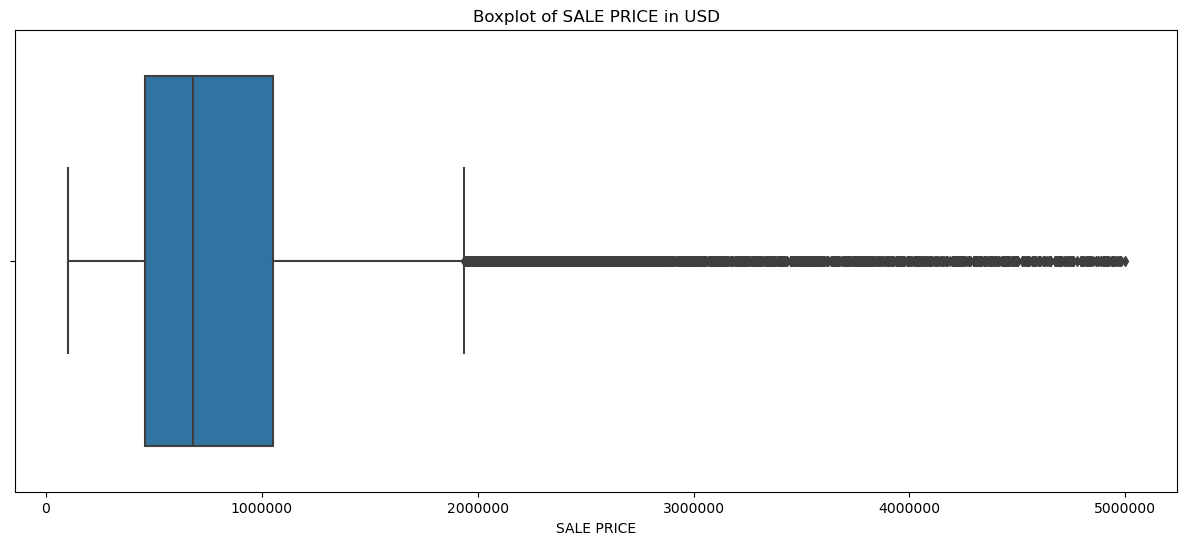

In [25]:
plt.figure(figsize=(15,6))

sns.boxplot(x='SALE PRICE', data=df_nyc)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

In [26]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36232 entries, 3 to 84545
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         36232 non-null  object        
 1   NEIGHBORHOOD                    36232 non-null  object        
 2   BUILDING CLASS CATEGORY         36232 non-null  object        
 3   TAX CLASS AT PRESENT            36232 non-null  category      
 4   BLOCK                           36232 non-null  int64         
 5   LOT                             36232 non-null  int64         
 6   BUILDING CLASS AT PRESENT       36232 non-null  object        
 7   ADDRESS                         36232 non-null  object        
 8   ZIP CODE                        36232 non-null  int64         
 9   RESIDENTIAL UNITS               36232 non-null  int64         
 10  COMMERCIAL UNITS                36232 non-null  int64         
 11  TOTAL U

In [27]:
df_nyc.shape

(36232, 19)

After cleaning the data, the number of records has reduced from `84,548` to `36,232` with a total of `19` columns.

# Measure of Central Tendency
---
## Mean
We will calculate the sale price mean

In [28]:
mean_saleprice = statistics.mean(df_nyc['SALE PRICE'])
print("Mean of Sale Price : ",mean_saleprice)

Mean of Sale Price :  920889.0945848973


We will calculate the sale price mean of each borough

In [29]:
df_borough = df_nyc[['BOROUGH','SALE PRICE']]
df_borough 

,BOROUGH,SALE PRICE
3,Manhattan,3936272.0
6,Manhattan,3192840.0
79,Manhattan,762669.0
80,Manhattan,772851.0
81,Manhattan,1034880.0
...,...,...
84540,Staten Islands,509000.0
84541,Staten Islands,648000.0
84543,Staten Islands,450000.0
84544,Staten Islands,550000.0


In [30]:
df_mean= df_borough.groupby('BOROUGH').mean()
df_mean = df_mean.sort_values(by='SALE PRICE',ascending=False)
df_mean

,SALE PRICE
BOROUGH,
Manhattan,1.800819e+06
Brooklyn,1.104765e+06
Queens,7.196564e+05
Bronx,5.981003e+05
Staten Islands,5.130620e+05


The output table is average property's sale price value in each Borough, We can conclude `Manhattan` has the highest averages sales. 

## Median
We will calculate median Year Built

In [31]:
median_saleprice = statistics.median(df_nyc['YEAR BUILT'])
print("Median of Sale Price : ",median_saleprice)

Median of Sale Price :  1940.0


We also will calculate median Year Built of each borough

In [32]:
df_borough = df_nyc[['BOROUGH','YEAR BUILT']]
df_borough 

,BOROUGH,YEAR BUILT
3,Manhattan,1913.0
6,Manhattan,1920.0
79,Manhattan,1920.0
80,Manhattan,1920.0
81,Manhattan,1920.0
...,...,...
84540,Staten Islands,1995.0
84541,Staten Islands,1994.0
84543,Staten Islands,1998.0
84544,Staten Islands,1998.0


In [33]:
df_median= df_borough.groupby('BOROUGH').median()
df_median = df_median.sort_values(by='YEAR BUILT',ascending=False)
df_median

,YEAR BUILT
BOROUGH,
Manhattan,1986.0
Staten Islands,1977.0
Queens,1940.0
Bronx,1931.0
Brooklyn,1930.0


The output table is median property sales value in each Borough.

# Mode / Modus

Let's see the Mode of several columns

In [34]:
mode_borough = statistics.mode(df_nyc['BOROUGH'])
mode_Neighborhood = statistics.mode(df_nyc['NEIGHBORHOOD'])
mode_TaxClassAtPresent = statistics.mode(df_nyc['TAX CLASS AT PRESENT'])
mode_BuildClassCategory = statistics.mode(df_nyc['BUILDING CLASS CATEGORY'])
mode_YearBuilt = statistics.mode(df_nyc['YEAR BUILT'])

In [35]:
print("Mode Borough                         :" , mode_borough)
print("Mode Neighborhood                    :" , mode_Neighborhood)
print("Mode Tax Class at Present            :" , mode_TaxClassAtPresent )
print("Mode Building Class Category         :" , mode_BuildClassCategory )
print("Year Built                           :" , mode_YearBuilt )

Mode Borough                         : Queens
Mode Neighborhood                    : FLUSHING-NORTH
Mode Tax Class at Present            : 1
Mode Building Class Category         : 01 ONE FAMILY DWELLINGS                    
Year Built                           : 1920.0


Based on the output, buyers tend to prefer buildings located around `Queens`, specifically in the `Flushing North` area, with a `tax class of 1`, falling under the building class category of `01 ONE FAMILY DWELLINGS` and constructed at `1920`.

# Measure of Spread
---
## Range

In [36]:
range_saleprice = np.ptp(df_nyc['SALE PRICE'])
range_lsf = np.ptp(df_nyc['LAND SQUARE FEET'])
range_gsf = np.ptp(df_nyc['GROSS SQUARE FEET'])
print("Range of Sale Price : ",range_saleprice)
print("Range of Land Square Feet : ",range_lsf)
print("Range of Gross Square Feet : ",range_gsf)

Range of Sale Price :  4896141.0
Range of Land Square Feet :  970000.0
Range of Gross Square Feet :  566858.0


## Variance

In [37]:
var_saleprice = statistics.variance(df_nyc['SALE PRICE'])
var_lsf = statistics.variance(df_nyc['LAND SQUARE FEET'])
var_gsf = statistics.variance(df_nyc['GROSS SQUARE FEET'])
print("Variance of Sale Price : ",var_saleprice)
print("Variance of Land Square Feet : ",var_lsf)
print("Variance of Gross Square Feet : ",var_gsf)

Variance of Sale Price :  594250809129.4525
Variance of Land Square Feet :  70207614.92757359
Variance of Gross Square Feet :  22500048.08752466


## Standard Deviation

In [38]:
std_saleprice = statistics.stdev(df_nyc['SALE PRICE'])
std_lsf = statistics.stdev(df_nyc['LAND SQUARE FEET'])
std_gsf = statistics.stdev(df_nyc['GROSS SQUARE FEET'])
print("Standard Deviation of Sale Price : ",std_saleprice)
print("Standard Deviation of Land Square Feet : ",std_lsf)
print("Standard Deviation of Gross Square Feet : ",std_gsf)

Standard Deviation of Sale Price :  770876.6497497848
Standard Deviation of Land Square Feet :  8378.998444180163
Standard Deviation of Gross Square Feet :  4743.421559120026


# Probability Distribution
---
Lets see the probability distribution of `Queens`

/tmp/ipykernel_9149/903032636.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(queens_dist,
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/rmfarizky/micromamba/envs/hlc/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_i

[Text(0.5, 0, 'Sale Price'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Probability Distribution of Queens')]

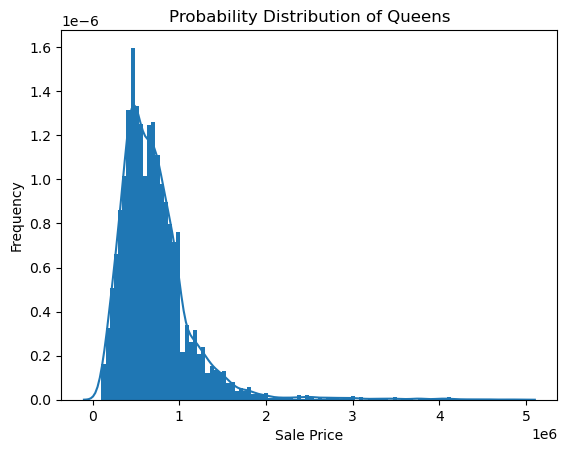

In [39]:
queens_dist = df_nyc[df_nyc['BOROUGH'] == 'Queens']['SALE PRICE']


ax = sns.distplot(queens_dist,
                  bins=100,
                  kde=True,           
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Sale Price', ylabel='Frequency', title='Probability Distribution of Queens')



Based on the above plot, it can be observed that the probability distribution for Sale Price in the Queens area is skewed to the right and tends to be normal in range `0 - 2,000,000`

# Confidence Intervals
---

In [40]:
CI = df_nyc.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
pd.options.display.float_format = "{:.2f}".format
CI

/tmp/ipykernel_9149/27324468.py:1: FutureWarning: The provided callable <function mean at 0x7fb9a47d5300> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  CI = df_nyc.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
/tmp/ipykernel_9149/27324468.py:1: FutureWarning: The provided callable <function std at 0x7fb9a47d54e0> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  CI = df_nyc.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})


SALE PRICE                  
                     mean        std   size
BOROUGH                                    
Bronx           598100.35  570824.85   3392
Brooklyn       1104765.03  791860.43  10823
Manhattan      1800818.58 1118909.65   4315
Queens          719656.45  441507.27  12233
Staten Islands  513061.97  266673.67   5469

In [41]:
mean_queens = CI.iloc[3,0]
sd = CI.iloc [3,1]
n = CI.iloc [3,2]         
z = 1.96 

Calculate the standard error using the formula for the standard error of the mean

In [42]:
se = sd / np.sqrt(n)

Calculate Confidence Intervals

In [43]:
lcb = mean_queens - z* se  #lower limit of the CI
ucb = mean_queens + z* se  #upper limit of the CI
lcb, ucb

(711832.4724786555, 727480.422150626)

Based on the calculation results, the average value of sale price in Queens will be in the range `711832.47 dan 727480.42`

# Hypothesis Testing
---

**Question : Is there a decrease in number of units sold for properties built after the year 1940?**

Significance level (alpha) : 5% (0.05)

Hypothesis :

- Null Hypothesis (H0): `μ1 >= μ2` (The mean number of units sold for properties built `after 1920` is the `same as or higher than` the mean number of units sold for properties built on or `before 1920`).
- Alternative Hypothesis (H1): `μ1 < μ2` (The mean number of units sold for properties built `after 1920` is `lower` than the mean number of units sold for properties built on or `before 1920`).



In [44]:
dx = df_nyc[['TOTAL UNITS','YEAR BUILT']]
dx.head()

,TOTAL UNITS,YEAR BUILT
3,10,1913.00
6,8,1920.00
79,1,1920.00
80,1,1920.00
81,1,1920.00


In [45]:
dx1 = dx[(dx['YEAR BUILT'] >= 1920)]
dx1.head()

,TOTAL UNITS,YEAR BUILT
6,8,1920.00
79,1,1920.00
80,1,1920.00
81,1,1920.00
85,1,1920.00


In [46]:
dx2 = dx[(dx['YEAR BUILT'] < 1920)]
dx2.head()

,TOTAL UNITS,YEAR BUILT
3,10,1913.00
123,1,1910.00
124,1,1910.00
125,1,1910.00
127,1,1910.00


In [47]:
n1 = len(dx1)
mu1 = dx1['TOTAL UNITS'].mean()
sd1 = dx1['TOTAL UNITS'].std()

n2 = len(dx2)
mu2 = dx2['TOTAL UNITS'].mean()
sd2 = dx2['TOTAL UNITS'].std()


In [48]:
z_stat, p_value = sm.stats.ztest(dx1['TOTAL UNITS'], dx2['TOTAL UNITS'], alternative='smaller')

print(f"Nilai z: {z_stat}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0")


Nilai z: -29.493713543767818
P-value: 1.7331169413661438e-191
Reject H0


Based on output, The `p-value` is less than `0,05`. Its means, there is enough statistical evidence to support the statement that the average number of units sold for properties built `after 1920` is `lower` than properties built `before 1920`.

# Conclusion
- **Data Cleaning** : After the data cleaning process, the number of entries reduced from 84,548 to 38,586, with 19 columns. The cleaned data can be used for further analysis, compared to the previous data which might have contained duplicates, null values, or outliers.

- **Average Sales** : The highest average sales occur in the borough of Manhattan.

- **Buyer Preferences** : Buyers tend to prefer buildings located around Queens, especially in the Flushing North area, with tax class 1, falling into the building class category of 01 ONE FAMILY DWELLINGS, and constructed in the year 1920.

- **Probability Distribution and Confidence Interval** : The probability distribution for Sale Price in the Queens area is skewed to the right and tends to approach a normal distribution. The Confidence Interval for the average Sale Price in the Queens area falls between `711832.47 dan 727480.42`.

- **Hypothesis Testing** : Through hypothesis testing with a significance level of 5%, it was found that the number of units sold for properties built after the year 1920 is lower compared to the number of units sold for properties built on or before 1920.